In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [3]:
data = pd.read_csv('C:\\Users\\Mahmoud M. Shehata\\Downloads\\income_evaluation (1).csv',na_values=[" ?"])
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [5]:
for i in data.select_dtypes(include='O').columns:
    data[i].fillna(data[i].mode()[0],inplace=True)


In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
for i in data.select_dtypes(exclude='number').columns:
    data[i]=data[i].apply(lambda x : x.strip())

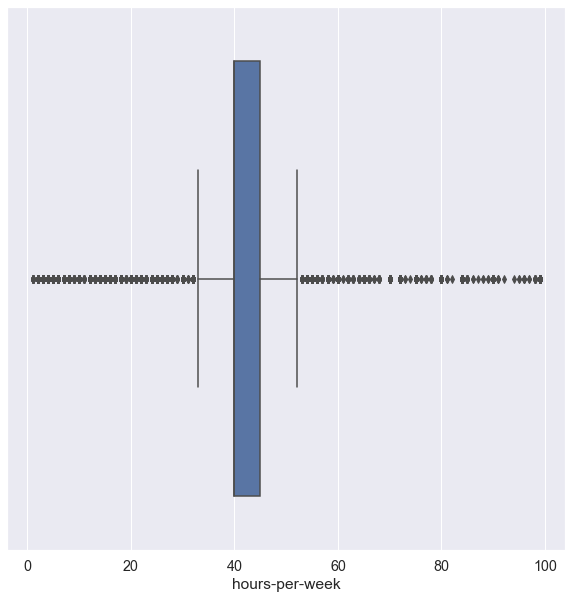

In [8]:
sns.boxplot(data["hours-per-week"]);

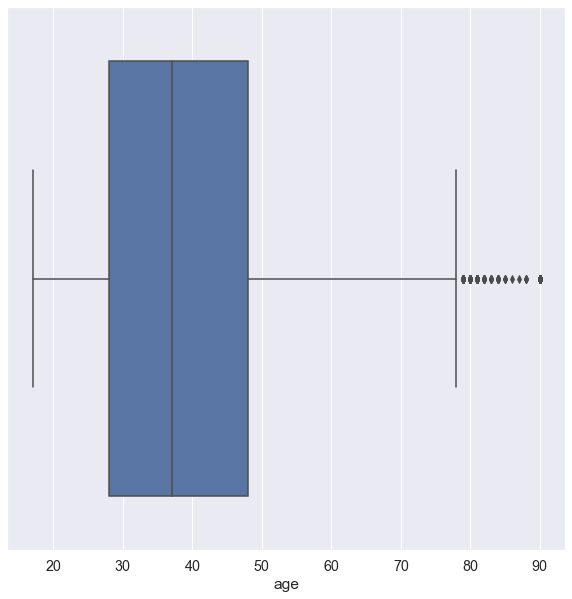

In [9]:
sns.boxplot(data["age"]);

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

In [11]:
data.loc[(data["hours-per-week"]<(Q1["hours-per-week"]-1.5*IQR["hours-per-week"]))
         |(data["hours-per-week"]>(Q3["hours-per-week"]+1.5*IQR["hours-per-week"])),"hours-per-week"].count()


9008

In [12]:
for col in data.select_dtypes(include='number').columns:
    data.loc[(data[col]<(Q1[col]-1.5*IQR[col]))|(data[col]>(Q3[col]+1.5*IQR[col])),col]=data[col].median()

## Ages of people not receiving salaries are between mid 20s and mid 60

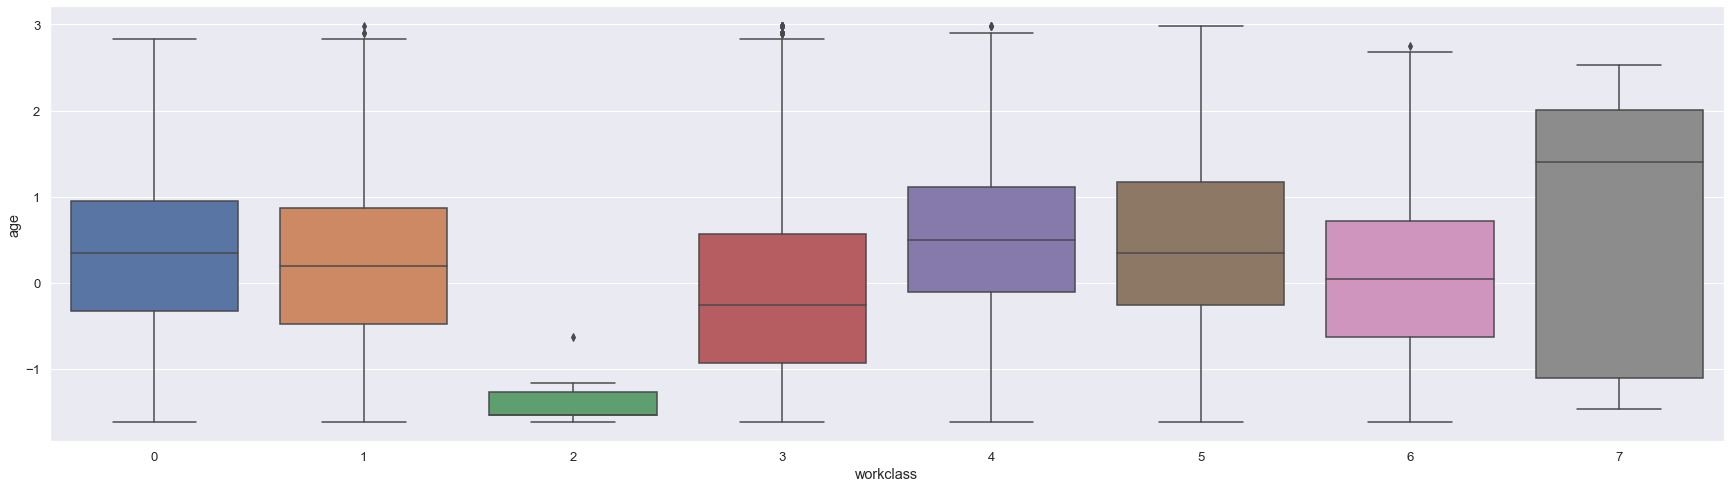

In [90]:
sns.boxplot(x="workclass",y="age",data=data);
sns.set(rc={'figure.figsize': [18, 10]}, font_scale=1.3)

In [14]:
data.drop(["fnlwgt"],axis=1,inplace=True)
data.drop(["relationship"],axis=1,inplace=True)
data.drop(["capital-loss"],axis=1,inplace=True)
data.drop(["capital-gain"],axis=1,inplace=True)

In [15]:
data

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,White,Male,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,White,Male,40.0,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,White,Male,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Black,Male,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Black,Female,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,White,Female,38.0,United-States,<=50K
32557,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,White,Male,40.0,United-States,>50K
32558,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,White,Female,40.0,United-States,<=50K
32559,22.0,Private,HS-grad,9.0,Never-married,Adm-clerical,White,Male,40.0,United-States,<=50K


# Private Workclass is the most dominant

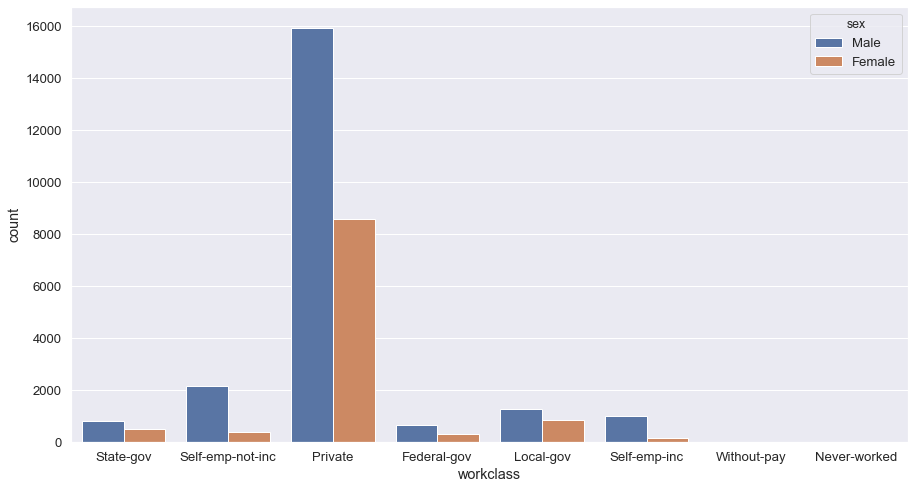

In [16]:
sns.set(rc={'figure.figsize': [15, 8]}, font_scale=1.2)
sns.countplot(x='workclass', hue='sex', data=data);

## Most of the man-power have a High-school degree


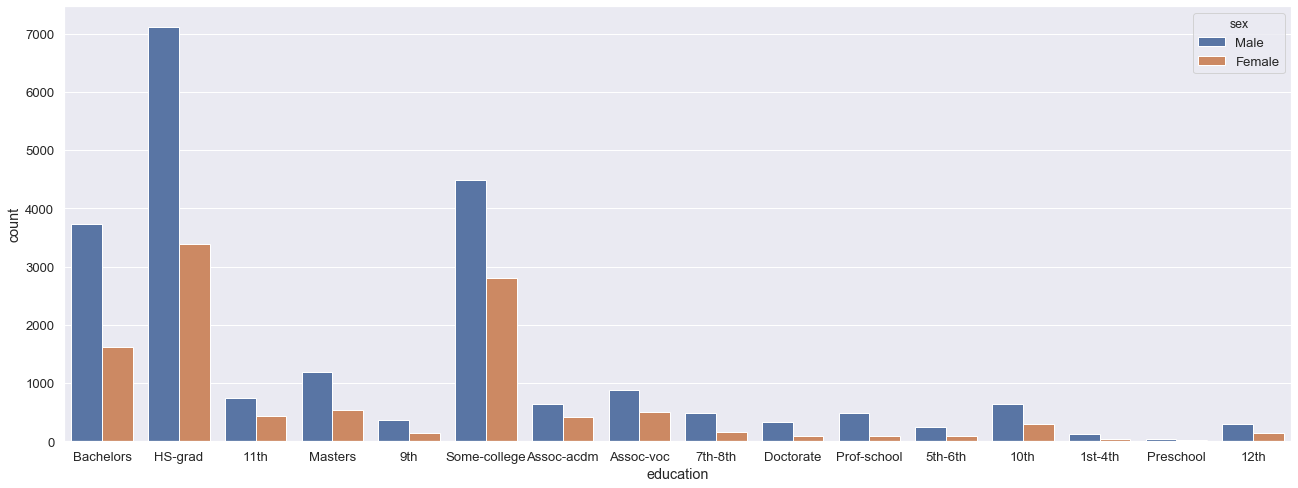

In [17]:
sns.set(rc={'figure.figsize': [22, 8]}, font_scale=1.2)
sns.countplot(x='education', hue='sex', data=data);

## The most dominant profession is Craft-repair among males according to the most degree optained which is High-school degree

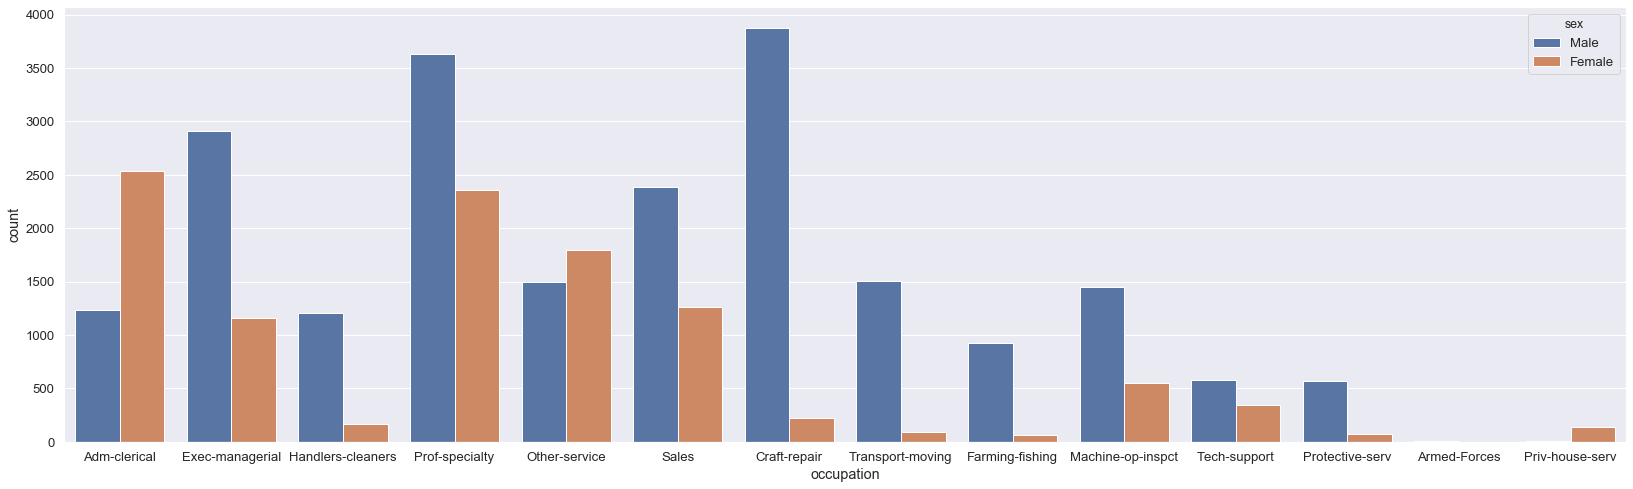

In [18]:
sns.set(rc={'figure.figsize': [28, 8]}, font_scale=1.2)
sns.countplot(x='occupation', hue='sex', data=data);

## hence , most of the man-power earn <= 50K according to the moderate education degree (High-school)

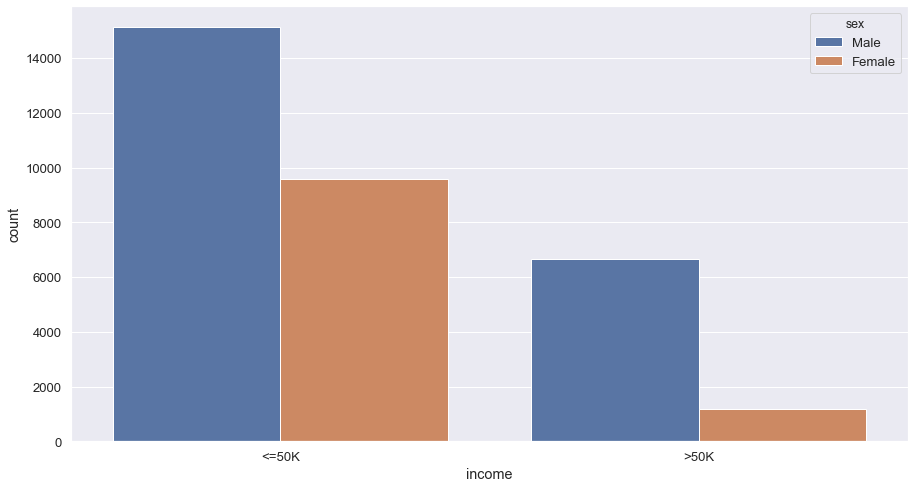

In [19]:
sns.set(rc={'figure.figsize': [15, 8]}, font_scale=1.2)
sns.countplot(x='income', hue='sex', data=data);

## All man-power with different degrees mostly work avg. 40h /week except people who optain Doctorate and Prof-School may work more than avg.

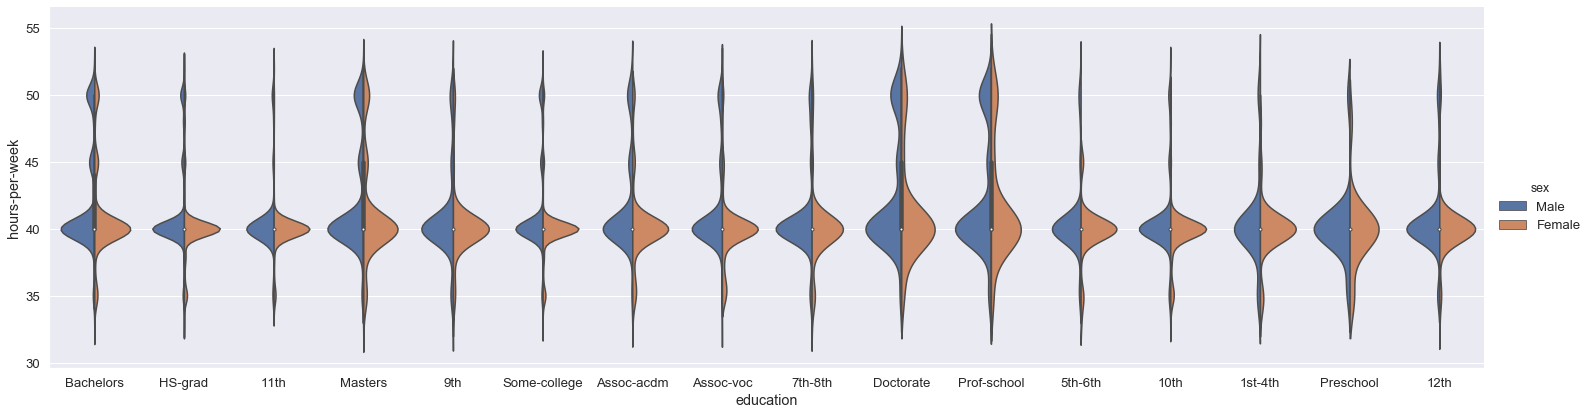

In [20]:
sns.set(rc={'figure.figsize': [30, 8]}, font_scale=1.2)
sns.catplot(x="education", y="hours-per-week", data=data, height=6, aspect=3.5, kind="violin", hue='sex', split=True);

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [45]:
sc = StandardScaler()
data[["age","hours-per-week"]]=sc.fit_transform(data[["age","hours-per-week"]])

## Applying label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
for i in data.columns:
    if data[i].dtype=='O':
        lb=LabelEncoder()
        data[i]=lb.fit_transform(data[i])

In [88]:
X=data.drop("income",axis=1)
y=data["income"]

## Using training algorithims , let's start by using logistic regression :

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression(max_iter = 10000)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [64]:
f1_score(y_test,lr_pred)


0.46887631366208576

In [54]:
lr.score(X_test,y_test)*100

79.82393284880746

In [55]:
y_test

14090    0
15022    0
8090     0
28369    0
12958    0
        ..
30492    0
16548    0
7227     0
32245    1
13828    0
Name: income, Length: 9769, dtype: int32

## Using K-Nearest point :

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)

In [63]:
f1_score(y_test,kn_pred)


0.6006191950464397

In [58]:
kn.score(X_test,y_test)*100

81.51294912478248

## Using Random forest :

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [61]:
rf.score(X_test, y_test)*100

81.09325417135838

In [62]:
f1_score(y_test,rf_pred)


0.5885497883715749

In [ ]:
## Note : Applying confusion matrix isn't necessary because type 1 & type 2 don't have critical cases 

## Applying hyperparameter (tuning)

In [69]:
from sklearn.model_selection import GridSearchCV

In [75]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=80)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [76]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 26, 27, 28, 29, 30, 31, 32, 33, 33, 34, 35, 36, 37, 38, 39, 40, 41, 41, 42, 43, 44, 45, 46, 47, 48, 48, 49, 50, 51, 52, 53, 54, 55, 56, 56, 57, 58, 59, 60, 61, 62, 63, 64, 64, 65, 66, 67, 68, 69, 70, 71, 72, 72, 73, 74, 75, 76, 77, 78, 79, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [77]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)


In [78]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 2560 candidates, totalling 7680 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 15.1min
[Parallel(n_jobs=4)]: Done 7680 out of 7680 | elapsed: 17.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 

In [79]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 19}

In [80]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.821
Test Accuracy - : 0.818


## Pickling to save the chosen model

In [81]:
import pickle

In [82]:
filename = "pickle_model.pk"
pickle.dump(rf, open(filename, 'wb'))

In [83]:
X_test.iloc[1,:].values

array([-0.70489153,  3.        , 15.        , 10.        ,  2.        ,
        9.        ,  4.        ,  0.        , -0.32480878, 38.        ])

In [84]:
model=pickle.load(open("pickle_model.pk", 'rb'))

In [86]:
model.predict(np.array([-0.70489153,  3.        , 15.        , 10.        ,  2.        ,
        9.        ,  4.        ,  0.        , -0.32480878, 38.        ]).reshape(1,-1))

array([0])